In [110]:
import pandas as pd
import numpy as np

df = list()
for j in range(1,489):
    n = "./round1/"+str(j)+".csv"
    with open(n,'rt') as file1:
        data1 = pd.read_csv(file1).as_matrix()
        for i in range(0,373):
            names = "./data/"+data1[i][0]+'.csv'
            with open(names,'at') as file:
                inputd = data1[i][1:]
                inputd = np.insert(inputd,0,j)
                csvout = csv.writer(file)
                csvout.writerow(inputd)

In [109]:
type(inputd)
# np.insert(h,0,[1],0)
print(inputd)
np.insert(inputd,0,j)

[18.18 0.96 0.99 0.02 0.23 0.03 0.15 0.03 3.12 -15.45 3.85 -15.45 3.85
 144.05 7.29 11.29 56.82 6.51 71.84 1.63 -1.66 -2.48 3.9 -1.29 1.13 1.52
 1.12 -1.1 5.24 521356.95 1381882230.0 3.77 5.73 -11.4 -3.14 -0.55 2.71
 -0.03 0.03 -0.29 -0.21 -0.69 -0.14 39.62 38.32 40.05 2.24 1.16 1.23 1.23
 1.31 1.8 1.84 2.15 1.9 1.81 3.11 -69320.34 -253805.35 144641276.0
 133508952.0 1.08 1.52 1.3 1.33 1.47 0.78 5.0 4.44 10.68 38.69 0.58 1.32
 2.92 0.01 -0.28 0.39 -0.14 0.13 1.77 9.32 86.86 0.15 0.04 0.97 3.65 13.33
 1.7]


array([488, 18.18, 0.96, 0.99, 0.02, 0.23, 0.03, 0.15, 0.03, 3.12, -15.45,
       3.85, -15.45, 3.85, 144.05, 7.29, 11.29, 56.82, 6.51, 71.84, 1.63,
       -1.66, -2.48, 3.9, -1.29, 1.13, 1.52, 1.12, -1.1, 5.24, 521356.95,
       1381882230.0, 3.77, 5.73, -11.4, -3.14, -0.55, 2.71, -0.03, 0.03,
       -0.29, -0.21, -0.69, -0.14, 39.62, 38.32, 40.05, 2.24, 1.16, 1.23,
       1.23, 1.31, 1.8, 1.84, 2.15, 1.9, 1.81, 3.11, -69320.34,
       -253805.35, 144641276.0, 133508952.0, 1.08, 1.52, 1.3, 1.33, 1.47,
       0.78, 5.0, 4.44, 10.68, 38.69, 0.58, 1.32, 2.92, 0.01, -0.28, 0.39,
       -0.14, 0.13, 1.77, 9.32, 86.86, 0.15, 0.04, 0.97, 3.65, 13.33, 1.7],
      dtype=object)

In [95]:
#有178支股票，87个f，一个close价格，

IndexError: index 178 is out of bounds for axis 0 with size 88

In [11]:
import pandas as pd
import numpy as np

with open('./data/stock100010.csv','rt') as file1:
    data1 = pd.read_csv(file1,header=None).as_matrix()


In [13]:
db = [0]
x,y = np.shape(data1)
for i in range(475):
    if data1[i+1][1]-data1[i][1] > 0:
        db.append(1)
    else:
        db.append(0)

In [14]:
import csv
for i in range(0,476):
    with open('stock100010.csv','at') as file:
        inpu = data1[i]
        inpu = np.insert(inpu,1,db[i]) 
        csvout = csv.writer(file)
        csvout.writerow(inpu)

In [135]:
sortedList[len(sortedList)-1][1]

1.0

In [90]:
np.array(a).reshape(-1,).tolist()

[-1.89836938710735e+17]

In [17]:
import re
a =  'jk/stock1003.csv'

In [120]:
def sigmoidFunc(data):
    g = 1.0 / ( 1.0 + np.exp(-data))
    return g

sigmoidFunc(10)

0.9999546021312976

In [4]:
# _*_ coding: utf-8 _*_
# using Python 3 to solve the problem.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import re



### Sigmoid Func ###
def sigmoidFunc(data):
    g = 1.0 / ( 1.0 + np.exp(-data))
    return g


### Training Logistic Func ###
def trainLogistic(dataset):
    data = dataset

    # 注意这里读入的矩阵默认是既没有行标签，也没有列标签的

    # 标注股票是涨还是跌的数据点，1代表涨，0代表跌
    # 我们的数据集第三列是标注
    judgeTag = list()
    x,y = np.shape(data)
    for j in range(x):
        judgeTag.append(data[j][2])
    judgeTag = np.transpose(np.mat(judgeTag))
    #print(judgeTag)
    # 从第4列开始是特征数据，不从第3列开始是因为第三列是价格，我们的涨跌本身就是从这个数据上得来的，已经得到过一次信息了
    # 权重w的更新使用随机梯度下降，步长是alpha，我们训练的目标是不断的更新权重。
    n = 87 # 这里定义为87是因为我们已经知道特征有87个
    weights = np.ones((n,1)) # 创建 n 行，一列的列向量
    alpha = 0.001 # 下降的步长
    cycles = 500 # 循环次数
    sampleMatrix = data[:,3:] #样本矩阵

    ### 以上为常量 ###

    ### 一下为每训练一次都会更新一次的量 ###
    for k in range(n):
        # 结果矩阵
        h = sigmoidFunc(sampleMatrix.dot(weights))
        #print(np.shape(sampleMatrix.dot(weights)))
        error = judgeTag - h
        #print(np.shape(error))
        transSampleMatrix = np.transpose(sampleMatrix)
        #print(np.shape(transSampleMatrix))
        weights = weights + (alpha * transSampleMatrix.dot(error))
        #print(np.shape(weights))
   
    return weights


### Test Error function ###
def test(data,w):
    judgeTag = list()
    x,y = np.shape(data)
    for j in range(x):
        judgeTag.append(data[j][2])
    judgeTag = np.transpose(np.mat(judgeTag))
    sampleMatrix = data[:,3:]
    
#     correctlist = list()
#     x,y = np.shape(judgeTag)
#     for i in range(y):
    error = judgeTag - sigmoidFunc(sampleMatrix.dot(w))
    error = np.square(error)
    #print(judgeTag)    
    return np.mean(error)

### File Input Function ### 
def getfiles(path=r'./data', rule=".csv"):
    all = []
    for fpathe,dirs,fs in os.walk(path):   # os.walk gets the directory of all files
        for f in fs:
            filename = os.path.join(fpathe,f)
            if filename.endswith(rule):  # Tell if ends with .csv
                all.append(filename)
    return all

### Portfolio function ###
def oneDayPredict(data,w):
    feature = np.array(data.dot(w)).reshape(-1,).tolist()
    increasePossibility = sigmoidFunc(feature[0])
    return increasePossibility


### Logistic Regression Model give the result ###
### input training data ###

# input all the file one by one
filelist = getfiles(r"./data")

# var list
count = 0
increase_Possibility_List = {}
errorDic = {}
truth = {}

date_list = range(2,30)
trueerror = 0

from sklearn import preprocessing 
for datedelay in date_list:
    for singleFile in filelist:
        with open(singleFile,'rt') as file:
            dataset_Raw = pd.read_csv(file,header = None).as_matrix()
        # normalization the raw data to make the gradient descent faster
        # also normalization convert all the data's unit become 1
        # which make the LR weight more reliable
        try:
            dataset = preprocessing.normalize(dataset_Raw)
        except ValueError:
            #print("inf in %s" % singleFile)
            continue
        
        # build the training and testing dataset for every stock
        l,e = np.shape(dataset)
        date = l - datedelay
        train = np.ones((int(l/2),e))
        testset = np.ones((l-int(1/2),e))

        for i in range(int(l/2)):
            train[i] = dataset[i]

        for j in range(int(l/2),l):
            testset[j] = dataset[j]

    ### build the portfolio test dataset ###   
        try:
            one_Day_Portfolio_Data = dataset[date,3:]
        except IndexError:
            #print("For %s index out of range" % singleFile)
            continue
    ### train and test ###
        w = trainLogistic(train) # 注意w是一个np列向量
        error = test(testset,w)
        increaseRate = oneDayPredict(one_Day_Portfolio_Data,w)
        
        name = re.findall('stock[0-9]*.csv$',singleFile)
        
    ### Print all the stocks which can be optimized with LR model ###
        if error < 0.08 and error > 0: # Limit the error rate 
            count += 1
            #print('For %s Error Rate = %g' % (name,error))
            increase_Possibility_List.update({name[0]:increaseRate})
            errorDic.update({name[0]:error})
            truth.update({name[0]:dataset_Raw[date+1,2]})
    #print('Here are %d stocks we can optimize with our model' % (count))

    ### Give the one-day-sale Portfolio ###
    # sorted the data with the increase Possibility
    sortedList = sorted(increase_Possibility_List.items(),key = lambda item:item[1])
    # we choose the best 10 to build the portfolio
    print("We choose these best 10 stocks to build the portfolio:")

    ### print the best 10 stocks without the srocks whose increase possibilty equal to 1 ###
    ### every stock whose increase possibility is 1 means the data is not enough ###
    ### real world possibility in stock market never can be 1 ###
    ### and from the raw data we can find that every stock whose increase possibility is 1 ###
    ### always only has 2 days data which makes the result unreliable. ###
    ii = 0
    j = len(sortedList)-1
    while ii < 10:
        if sortedList[j][1] != 1:
            ii += 1
            errorRate = errorDic[sortedList[j][0]]
            true = truth[sortedList[j][0]]
            print("%s  with increasing rate : %g ," % sortedList[j], end="")
            print( " error rate : %g" % errorRate, end = "")
            print(" the True Fact : %d" % true)
            if true == 0.0:
                trueerror += 1
        j -= 1
    print(trueerror)
print(trueerror/(10*len(date_list)))

We choose these best 10 stocks to build the portfolio:
stock100619.csv  with increasing rate : 0.73351 , error rate : 0.0456088 the True Fact : 0
stock102840.csv  with increasing rate : 0.659136 , error rate : 0.00798636 the True Fact : 0
stock102432.csv  with increasing rate : 0.511107 , error rate : 0.0788922 the True Fact : 0
stock102101.csv  with increasing rate : 0.473767 , error rate : 0.0607664 the True Fact : 1
stock103415.csv  with increasing rate : 0.436887 , error rate : 0.0574678 the True Fact : 0
stock101738.csv  with increasing rate : 0.415876 , error rate : 0.0690661 the True Fact : 0
stock102682.csv  with increasing rate : 0.392697 , error rate : 0.0753384 the True Fact : 1
stock100044.csv  with increasing rate : 0.381355 , error rate : 0.0748098 the True Fact : 0
stock102912.csv  with increasing rate : 0.374046 , error rate : 0.0669299 the True Fact : 0
stock102337.csv  with increasing rate : 0.372726 , error rate : 0.0675167 the True Fact : 1
7
We choose these best 10

We choose these best 10 stocks to build the portfolio:
stock102860.csv  with increasing rate : 0.786138 , error rate : 0.0607971 the True Fact : 1
stock101461.csv  with increasing rate : 0.781994 , error rate : 0.0688815 the True Fact : 1
stock101542.csv  with increasing rate : 0.75192 , error rate : 0.071692 the True Fact : 1
stock102638.csv  with increasing rate : 0.746374 , error rate : 0.0541312 the True Fact : 1
stock100619.csv  with increasing rate : 0.72695 , error rate : 0.0456088 the True Fact : 0
stock103400.csv  with increasing rate : 0.717229 , error rate : 0.0509516 the True Fact : 1
stock102186.csv  with increasing rate : 0.705593 , error rate : 0.0441076 the True Fact : 1
stock100699.csv  with increasing rate : 0.631532 , error rate : 0.061709 the True Fact : 1
stock103156.csv  with increasing rate : 0.538026 , error rate : 0.0257456 the True Fact : 0
stock102432.csv  with increasing rate : 0.520804 , error rate : 0.0788922 the True Fact : 1
27
We choose these best 10 st

We choose these best 10 stocks to build the portfolio:
stock102860.csv  with increasing rate : 0.786138 , error rate : 0.0607971 the True Fact : 1
stock101461.csv  with increasing rate : 0.781994 , error rate : 0.0688815 the True Fact : 1
stock101542.csv  with increasing rate : 0.75192 , error rate : 0.071692 the True Fact : 1
stock102638.csv  with increasing rate : 0.746374 , error rate : 0.0541312 the True Fact : 1
stock103400.csv  with increasing rate : 0.717229 , error rate : 0.0509516 the True Fact : 1
stock102186.csv  with increasing rate : 0.709349 , error rate : 0.0441076 the True Fact : 0
stock100699.csv  with increasing rate : 0.655477 , error rate : 0.061709 the True Fact : 0
stock100619.csv  with increasing rate : 0.63434 , error rate : 0.0456088 the True Fact : 1
stock101074.csv  with increasing rate : 0.616121 , error rate : 0.0363936 the True Fact : 1
stock102905.csv  with increasing rate : 0.558795 , error rate : 0.038986 the True Fact : 1
49
We choose these best 10 sto

We choose these best 10 stocks to build the portfolio:
stock100619.csv  with increasing rate : 0.802114 , error rate : 0.0456088 the True Fact : 0
stock102860.csv  with increasing rate : 0.786138 , error rate : 0.0607971 the True Fact : 1
stock101461.csv  with increasing rate : 0.781994 , error rate : 0.0688815 the True Fact : 1
stock101542.csv  with increasing rate : 0.75192 , error rate : 0.071692 the True Fact : 1
stock102638.csv  with increasing rate : 0.746374 , error rate : 0.0541312 the True Fact : 1
stock103400.csv  with increasing rate : 0.717229 , error rate : 0.0509516 the True Fact : 1
stock102993.csv  with increasing rate : 0.710018 , error rate : 0.0543418 the True Fact : 1
stock102186.csv  with increasing rate : 0.709349 , error rate : 0.0441076 the True Fact : 0
stock103156.csv  with increasing rate : 0.605311 , error rate : 0.0257456 the True Fact : 1
stock102555.csv  with increasing rate : 0.520532 , error rate : 0.0661832 the True Fact : 1
82
0.29285714285714287


We choose these best 10 stocks to build the portfolio:
stock102860.csv  with increasing rate : 0.786138 , error rate : 0.0607971 the True Fact : 1
stock101461.csv  with increasing rate : 0.781994 , error rate : 0.0688815 the True Fact : 1
stock102638.csv  with increasing rate : 0.746374 , error rate : 0.0541312 the True Fact : 1
stock100619.csv  with increasing rate : 0.731562 , error rate : 0.0456088 the True Fact : 1
stock103400.csv  with increasing rate : 0.717229 , error rate : 0.0509516 the True Fact : 1
stock102912.csv  with increasing rate : 0.695666 , error rate : 0.0669299 the True Fact : 1
stock102840.csv  with increasing rate : 0.6317 , error rate : 0.00798636 the True Fact : 1
stock102432.csv  with increasing rate : 0.4906 , error rate : 0.0788922 the True Fact : 1
stock101738.csv  with increasing rate : 0.450844 , error rate : 0.0690661 the True Fact : 1
stock102101.csv  with increasing rate : 0.445272 , error rate : 0.0607664 the True Fact : 1
0
We choose these best 10 st

We choose these best 10 stocks to build the portfolio:
stock102860.csv  with increasing rate : 0.786138 , error rate : 0.0607971 the True Fact : 1
stock101461.csv  with increasing rate : 0.781994 , error rate : 0.0688815 the True Fact : 1
stock101542.csv  with increasing rate : 0.75192 , error rate : 0.071692 the True Fact : 1
stock102638.csv  with increasing rate : 0.746374 , error rate : 0.0541312 the True Fact : 1
stock103400.csv  with increasing rate : 0.717229 , error rate : 0.0509516 the True Fact : 1
stock102186.csv  with increasing rate : 0.709349 , error rate : 0.0441076 the True Fact : 0
stock100619.csv  with increasing rate : 0.703885 , error rate : 0.0456088 the True Fact : 1
stock100699.csv  with increasing rate : 0.667631 , error rate : 0.061709 the True Fact : 1
stock103156.csv  with increasing rate : 0.523666 , error rate : 0.0257456 the True Fact : 1
stock101775.csv  with increasing rate : 0.485191 , error rate : 0.0618792 the True Fact : 1
21
We choose these best 10 s

We choose these best 10 stocks to build the portfolio:
stock102860.csv  with increasing rate : 0.786138 , error rate : 0.0607971 the True Fact : 1
stock101461.csv  with increasing rate : 0.781994 , error rate : 0.0688815 the True Fact : 1
stock101542.csv  with increasing rate : 0.75192 , error rate : 0.071692 the True Fact : 1
stock102638.csv  with increasing rate : 0.746374 , error rate : 0.0541312 the True Fact : 1
stock103400.csv  with increasing rate : 0.717229 , error rate : 0.0509516 the True Fact : 1
stock102186.csv  with increasing rate : 0.709349 , error rate : 0.0441076 the True Fact : 0
stock100699.csv  with increasing rate : 0.627216 , error rate : 0.061709 the True Fact : 0
stock101074.csv  with increasing rate : 0.607725 , error rate : 0.0363936 the True Fact : 0
stock102905.csv  with increasing rate : 0.557364 , error rate : 0.038986 the True Fact : 1
stock103363.csv  with increasing rate : 0.49662 , error rate : 0.0605148 the True Fact : 0
46
We choose these best 10 sto

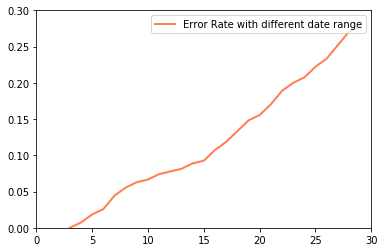

In [10]:
# _*_ coding: utf-8 _*_
# using Python 3 to solve the problem.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import re



### Sigmoid Func ###
def sigmoidFunc(data):
    g = 1.0 / ( 1.0 + np.exp(-data))
    return g


### Training Logistic Func ###
def trainLogistic(dataset):
    data = dataset

    # 注意这里读入的矩阵默认是既没有行标签，也没有列标签的

    # 标注股票是涨还是跌的数据点，1代表涨，0代表跌
    # 我们的数据集第三列是标注
    judgeTag = list()
    x,y = np.shape(data)
    for j in range(x):
        judgeTag.append(data[j][2])
    judgeTag = np.transpose(np.mat(judgeTag))
    #print(judgeTag)
    # 从第4列开始是特征数据，不从第3列开始是因为第三列是价格，我们的涨跌本身就是从这个数据上得来的，已经得到过一次信息了
    # 权重w的更新使用随机梯度下降，步长是alpha，我们训练的目标是不断的更新权重。
    n = 87 # 这里定义为87是因为我们已经知道特征有87个
    weights = np.ones((n,1)) # 创建 n 行，一列的列向量
    alpha = 0.001 # 下降的步长
    cycles = 500 # 循环次数
    sampleMatrix = data[:,3:] #样本矩阵

    ### 以上为常量 ###

    ### 一下为每训练一次都会更新一次的量 ###
    for k in range(n):
        # 结果矩阵
        h = sigmoidFunc(sampleMatrix.dot(weights))
        #print(np.shape(sampleMatrix.dot(weights)))
        error = judgeTag - h
        #print(np.shape(error))
        transSampleMatrix = np.transpose(sampleMatrix)
        #print(np.shape(transSampleMatrix))
        weights = weights + (alpha * transSampleMatrix.dot(error))
        #print(np.shape(weights))
   
    return weights


### Test Error function ###
def test(data,w):
    judgeTag = list()
    x,y = np.shape(data)
    for j in range(x):
        judgeTag.append(data[j][2])
    judgeTag = np.transpose(np.mat(judgeTag))
    sampleMatrix = data[:,3:]
    
#     correctlist = list()
#     x,y = np.shape(judgeTag)
#     for i in range(y):
    error = judgeTag - sigmoidFunc(sampleMatrix.dot(w))
    error = np.square(error)
    #print(judgeTag)    
    return np.mean(error)

### File Input Function ### 
def getfiles(path=r'./data', rule=".csv"):
    all = []
    for fpathe,dirs,fs in os.walk(path):   # os.walk gets the directory of all files
        for f in fs:
            filename = os.path.join(fpathe,f)
            if filename.endswith(rule):  # Tell if ends with .csv
                all.append(filename)
    return all

### Portfolio function ###
def oneDayPredict(data,w):
    feature = np.array(data.dot(w)).reshape(-1,).tolist()
    increasePossibility = sigmoidFunc(feature[0])
    return increasePossibility


### Logistic Regression Model give the result ###
### input training data ###

# input all the file one by one
filelist = getfiles(r"./data")

# var list
count = 0

#dl_list = range(4,30)
errorratelist = list()
from sklearn import preprocessing 

#for daylength in dl_list:
increase_Possibility_List = {}
errorDic = {}
truth = {}
date_list = range(2,30)
trueerror = 0

for datedelay in date_list:
    for singleFile in filelist:
        with open(singleFile,'rt') as file:
            dataset_Raw = pd.read_csv(file,header = None).as_matrix()
        # normalization the raw data to make the gradient descent faster
        # also normalization convert all the data's unit become 1
        # which make the LR weight more reliable
        try:
            dataset = preprocessing.normalize(dataset_Raw)
        except ValueError:
            #print("inf in %s" % singleFile)
            continue

        # build the training and testing dataset for every stock
        l,e = np.shape(dataset)
        date = l - datedelay
        train = np.ones((int(l/2),e))
        testset = np.ones((l-int(1/2),e))

        for i in range(int(l/2)):
            train[i] = dataset[i]

        for j in range(int(l/2),l):
            testset[j] = dataset[j]

    ### build the portfolio test dataset ###   
        try:
            one_Day_Portfolio_Data = dataset[date,3:]
        except IndexError:
            #print("For %s index out of range" % singleFile)
            continue
    ### train and test ###
        w = trainLogistic(train) # 注意w是一个np列向量
        error = test(testset,w)
        increaseRate = oneDayPredict(one_Day_Portfolio_Data,w)

        name = re.findall('stock[0-9]*.csv$',singleFile)

    ### Print all the stocks which can be optimized with LR model ###
        if error < 0.08 and error > 0: # Limit the error rate 
            count += 1
            #print('For %s Error Rate = %g' % (name,error))
            increase_Possibility_List.update({name[0]:increaseRate})
            errorDic.update({name[0]:error})
            truth.update({name[0]:dataset_Raw[date+1,2]})
    #print('Here are %d stocks we can optimize with our model' % (count))

    ### Give the one-day-sale Portfolio ###
    # sorted the data with the increase Possibility
    sortedList = sorted(increase_Possibility_List.items(),key = lambda item:item[1])
    # we choose the best 10 to build the portfolio
    print("We choose these best 10 stocks to build the portfolio:")

    ### print the best 10 stocks without the srocks whose increase possibilty equal to 1 ###
    ### every stock whose increase possibility is 1 means the data is not enough ###
    ### real world possibility in stock market never can be 1 ###
    ### and from the raw data we can find that every stock whose increase possibility is 1 ###
    ### always only has 2 days data which makes the result unreliable. ###
    ii = 0
    j = len(sortedList)-1
    while ii < 10:
        if sortedList[j][1] != 1:
            ii += 1
            errorRate = errorDic[sortedList[j][0]]
            true = truth[sortedList[j][0]]
            print("%s  with increasing rate : %g ," % sortedList[j], end="")
            print( " error rate : %g" % errorRate, end = "")
            print(" the True Fact : %d" % true)
            if true == 0.0:
                trueerror += 1
        j -= 1
    print(trueerror)
    errorratelist.append(trueerror/(10*len(date_list)))
print(trueerror/(10*len(date_list)))
#errorratelist.append(trueerror/(10*len(date_list)))

### Draw the error chart ###
x = range(2,30)
y = errorratelist
plt.figure()
plt.plot(x,y,color='coral',linewidth=2.0,label="Error Rate with different date range")
plt.legend(loc='upper right')
plt.xlim(0,30)
plt.ylim(0,0.3)
plt.show()

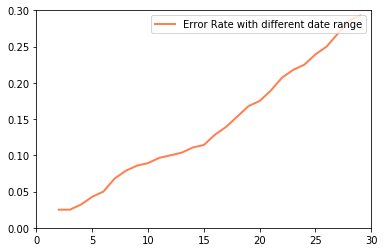

In [9]:
x = range(2,30)
y = errorratelist
plt.figure()
plt.plot(x,y,color='coral',linewidth=2.0,label="Error Rate with different date range")
plt.legend(loc='upper right')
plt.xlim(0,30)
plt.ylim(0,0.3)
plt.show()